In [1]:
import pandas as pd
df=pd.read_csv(r"c:\Users\YESHWANTH\Downloads\student_feedback.csv")
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
df.columns = ["Student_Id","Subject_knowledge","Concept_clarity","Presentation_use","Assignment_Difficulty","Doubt_solving","Course_structure", "Supportiveness","Recommendation_relevance"]
df.describe()

,Student_Id,Subject_knowledge,Concept_clarity,Presentation_use,Assignment_Difficulty,Doubt_solving,Course_structure,Supportiveness,Recommendation_relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


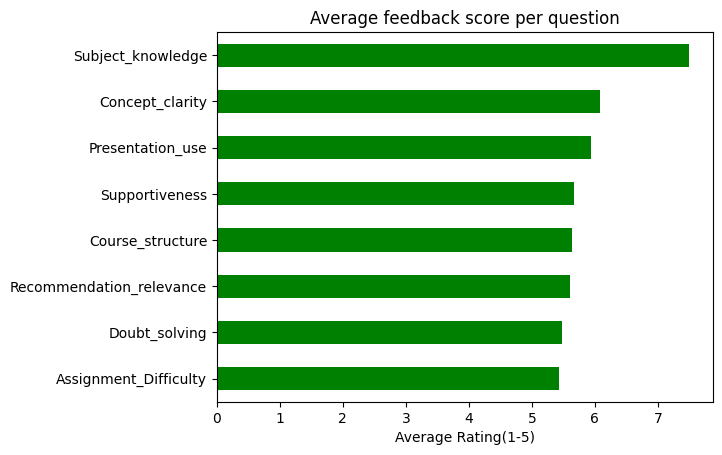

In [5]:
import matplotlib.pyplot as plt

question_means = df.drop(columns=["Student_Id"]).mean().sort_values()
question_means.plot(kind="barh",color="green")
plt.title("Average feedback score per question")
plt.xlabel("Average Rating(1-5)")
plt.show()

Text(0.5, 1.0, 'Correlation Between Feedback Parameters')

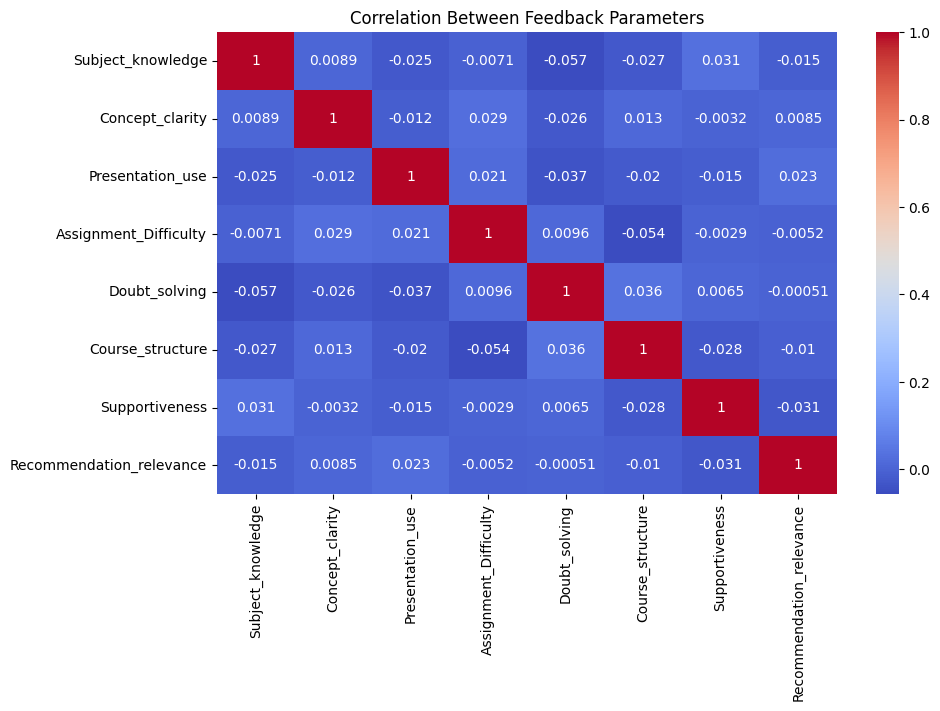

In [6]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns="Student_Id").corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Between Feedback Parameters")

In [7]:
question_means.sort_values(ascending=False)


Subject_knowledge           7.497502
Concept_clarity             6.081918
Presentation_use            5.942058
Supportiveness              5.662338
Course_structure            5.636364
Recommendation_relevance    5.598402
Doubt_solving               5.474525
Assignment_Difficulty       5.430569
dtype: float64

In [8]:
df.groupby("Student_Id").mean().head()


,Subject_knowledge,Concept_clarity,Presentation_use,Assignment_Difficulty,Doubt_solving,Course_structure,Supportiveness,Recommendation_relevance
Student_Id,,,,,,,,
0,7.0,4.0,8.0,2.0,1.0,4.0,8.0,3.0
1,9.0,6.0,8.0,7.0,6.0,5.0,3.0,10.0
2,10.0,2.0,7.0,3.0,10.0,4.0,4.0,7.0
3,9.0,6.0,5.0,9.0,10.0,5.0,5.0,4.0
4,5.0,8.0,5.0,7.0,10.0,7.0,3.0,1.0


In [9]:
df["Final_Score"] = df.drop(columns=["Student_Id"]).mean(axis=1)
df.head()

,Student_Id,Subject_knowledge,Concept_clarity,Presentation_use,Assignment_Difficulty,Doubt_solving,Course_structure,Supportiveness,Recommendation_relevance,Final_Score
0,340,5,2,7,6,9,2,1,8,5.000
1,253,6,5,8,6,2,1,2,9,4.875
2,680,7,7,6,5,4,2,3,1,4.375
3,806,9,6,7,1,5,9,4,6,5.875
4,632,8,10,8,4,6,6,9,9,7.500


In [10]:
df["Feedback_Level"] = pd.cut(df["Final_Score"], bins=[0,2.5,3.5,4.5,5],
                              labels=["Poor", "Average", "Good", "Excellent"])
df.head()

,Student_Id,Subject_knowledge,Concept_clarity,Presentation_use,Assignment_Difficulty,Doubt_solving,Course_structure,Supportiveness,Recommendation_relevance,Final_Score,Feedback_Level
0,340,5,2,7,6,9,2,1,8,5.000,Excellent
1,253,6,5,8,6,2,1,2,9,4.875,Excellent
2,680,7,7,6,5,4,2,3,1,4.375,Good
3,806,9,6,7,1,5,9,4,6,5.875,NaN
4,632,8,10,8,4,6,6,9,9,7.500,NaN


In [11]:
df.dtypes


Student_Id                     int64
Subject_knowledge              int64
Concept_clarity                int64
Presentation_use               int64
Assignment_Difficulty          int64
Doubt_solving                  int64
Course_structure               int64
Supportiveness                 int64
Recommendation_relevance       int64
Final_Score                  float64
Feedback_Level              category
dtype: object

In [12]:
avg_scores = df.drop(columns=["Student_Id", "Final_Score", "Feedback_Level"]).mean()


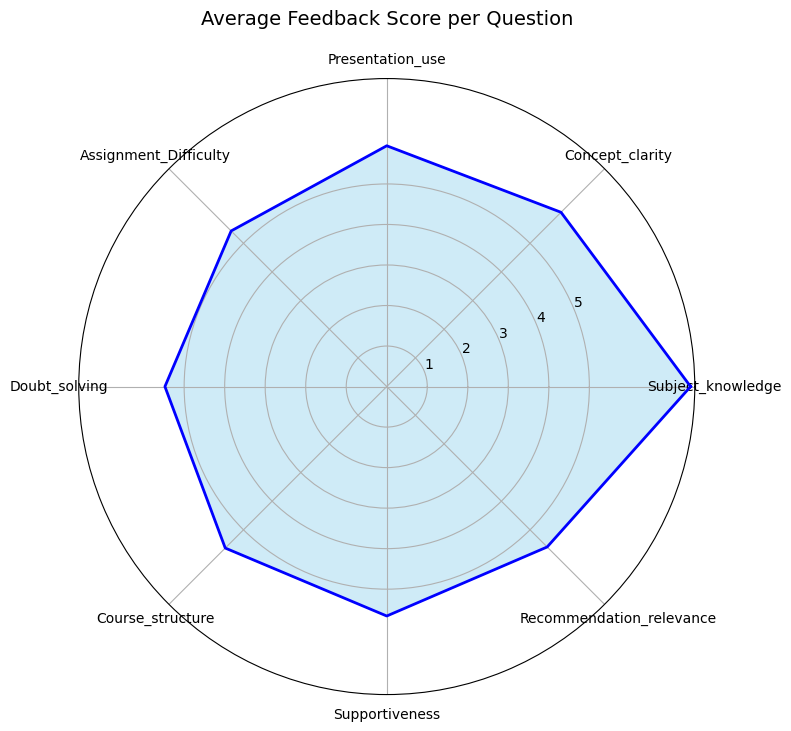

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculate average scores for feedback questions only
feedback_cols = ["Subject_knowledge", "Concept_clarity", "Presentation_use",
                 "Assignment_Difficulty", "Doubt_solving", "Course_structure",
                 "Supportiveness", "Recommendation_relevance"]

avg_scores = df[feedback_cols].mean()

# Step 2: Extract labels and values
labels = avg_scores.index.tolist()           # 8 labels
values = avg_scores.values.tolist()          # 8 values

# Step 3: Close the plot by repeating first value and label
labels += [labels[0]]
values += [values[0]]

# Step 4: Generate angles
angles = np.linspace(0, 2 * np.pi, len(labels)).tolist()

# Step 5: Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='blue', linewidth=2)
ax.fill(angles, values, color='skyblue', alpha=0.4)

# Setup axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels[:-1], fontsize=10)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['1', '2', '3', '4', '5'])

ax.set_title("Average Feedback Score per Question", size=14, pad=20)
plt.show()


In [14]:
# Average score for each feedback category
avg_scores = df[['Subject_knowledge', 'Concept_clarity', 'Presentation_use',
                 'Assignment_Difficulty', 'Doubt_solving', 'Course_structure',
                 'Supportiveness', 'Recommendation_relevance']].mean()

print("🔹 Average Scores per Question:")
print(avg_scores.sort_values(ascending=False))


🔹 Average Scores per Question:
Subject_knowledge           7.497502
Concept_clarity             6.081918
Presentation_use            5.942058
Supportiveness              5.662338
Course_structure            5.636364
Recommendation_relevance    5.598402
Doubt_solving               5.474525
Assignment_Difficulty       5.430569
dtype: float64


C:\Users\YESHWANTH\AppData\Local\Temp\ipykernel_19944\4148492169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Feedback_Level', palette='viridis')


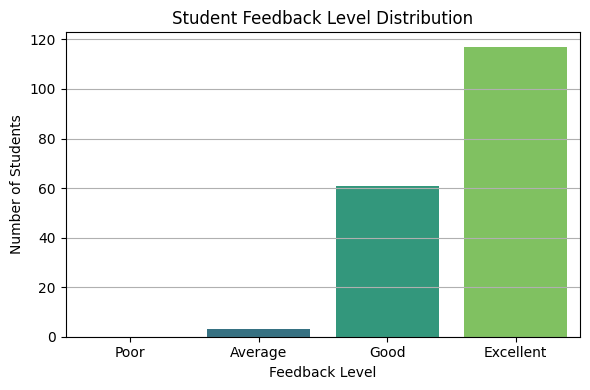

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Feedback_Level', palette='viridis')
plt.title("Student Feedback Level Distribution")
plt.xlabel("Feedback Level")
plt.ylabel("Number of Students")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#END